**Klasifikasi menggunakan Support Vector Machine**

In [70]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA


In [71]:
# Load dataset
data = pd.read_csv('/content/obesity_data (1).csv')

In [72]:
data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [74]:
data.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [75]:
print(data.columns)

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')


In [76]:
# Mengubah kolom tipe kategorik menjadi numerik
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['ObesityCategory'] = label_encoder.fit_transform(data['ObesityCategory'])

data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,1
997,49,0,156.570956,78.804284,32.146036,1,1
998,64,1,164.192222,57.978115,21.505965,4,0


In [77]:
# Menghitung korelasi antara variabel 'target' dengan semua variabel lainnya
correlation = data.corr()['ObesityCategory'].abs().sort_values(ascending=False)

# Mencetak korelasi
print(correlation)

ObesityCategory          1.000000
Weight                   0.162656
BMI                      0.139882
Gender                   0.036335
Height                   0.028463
Age                      0.010917
PhysicalActivityLevel    0.009728
Name: ObesityCategory, dtype: float64


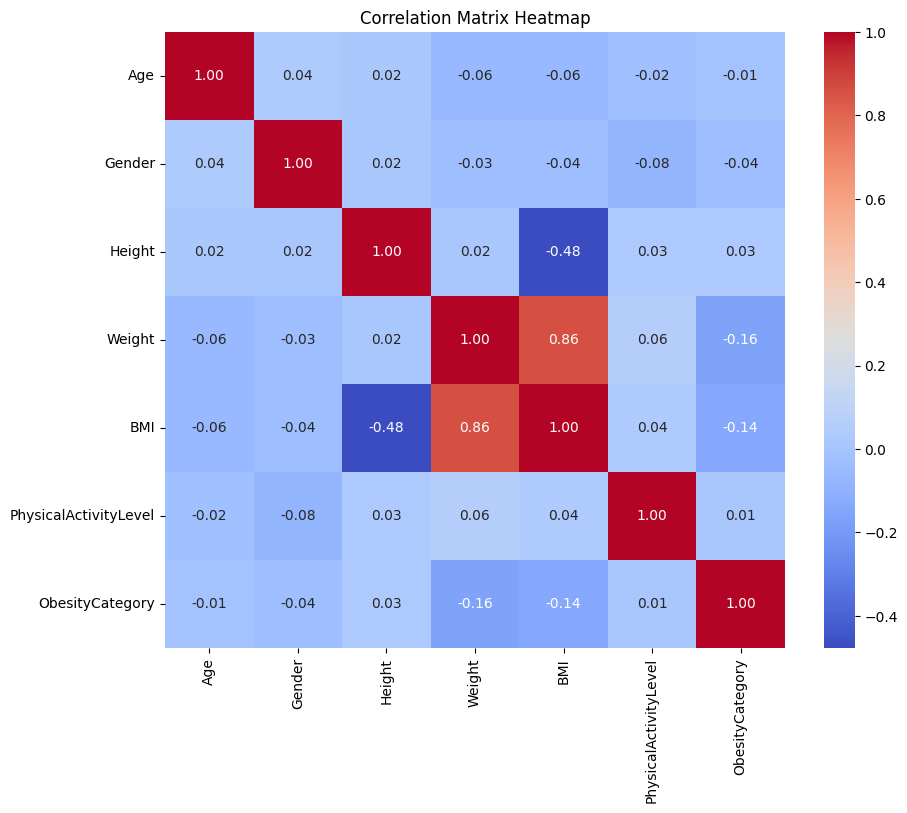

In [78]:
# Menghitung koreasi menggunakan perhitungan matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [79]:
# Memilih kolom fitur (features) dan label (target)
X = data.iloc[:, :6].values  # Memilih kolom 0 hingga 5 sebagai fitur
y = data.iloc[:, 6].values   # Memilih kolom 6 sebagai target

In [80]:
# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# Melakukan reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [83]:
# Membangun model SVM
svc = SVC(kernel='linear', random_state=42)
# Latih model SVM
svc.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [84]:
# Memprediksi label untuk data uji
y_pred = svc.predict(X_test_pca)

In [85]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.92
Confusion Matrix:
[[68  0  3  1]
 [ 0 29  3  0]
 [ 4  2 59  0]
 [ 3  0  0 28]]


<ipython-input-86-9813bd346bb4>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


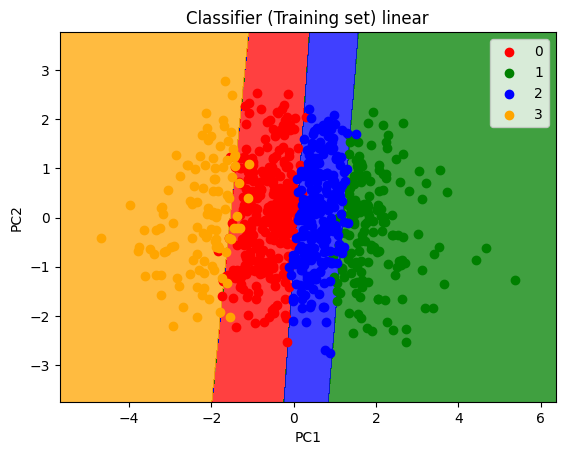

In [86]:
# Visualisasi hasil
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue', 'orange'))(i), label=j)
plt.title('Classifier (Training set) linear')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


<ipython-input-87-26c1889bc5a8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


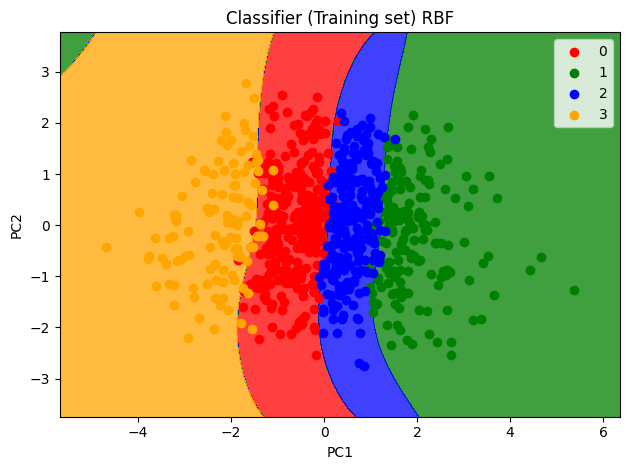

In [87]:
# Model SVM dengan kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf.fit(X_train_pca, y_train)
y_pred = svm_rbf.predict(X_test_pca)
# Plot pemisahan kelas dengan kernel RBF
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue', 'orange'))(i), label=j)
plt.title('Classifier (Training set) RBF')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()